In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

learning_rate = 0 # compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
regularization = None
nb_layers_CNN = 2
activation_function = None
epochs = 25
ds_training, validation , test = (80,10,10)

import pandas as pd
df = pd.DataFrame([[10, 20, 30], [100, 200, 300]],
                  columns=['foo', 'bar', 'baz'])
def get_methods(object, spacing=20):
  methodList = []
  for method_name in dir(object):
    try:
        if callable(getattr(object, method_name)):
            methodList.append(str(method_name))
    except Exception:
        methodList.append(str(method_name))
  processFunc = (lambda s: ' '.join(s.split())) or (lambda s: s)
  # for method in methodList:
  #   try:
  #       print(str(method.ljust(spacing)) + ' ' +
  #             processFunc(str(getattr(object, method).__doc__)[0:90]))
  #   except Exception:
  #       print(method.ljust(spacing) + ' ' + ' getattr() failed')
  return methodList
# Modify parameters such as: 
# learningrate, , optimizers, number of layers in CNN, activation function, epochs, .
# Produce Cost and Accuracy graphs and the confusion matrix on the test data for the set of parameters that work best.


<class 'str'>
<class 'pathlib.WindowsPath'>
25000


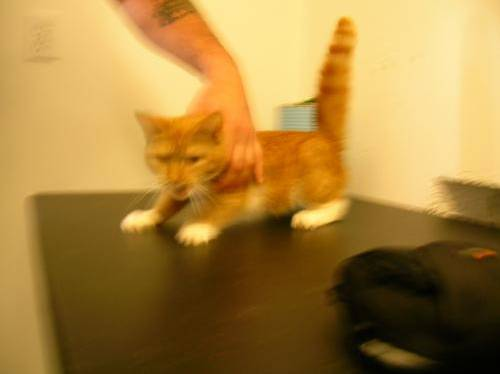

In [12]:
import pathlib

data_train_dir = "dogs-vs-cats/train"
print(type(data_train_dir))
data_dir = pathlib.Path(data_train_dir)
print(type(data_dir))

image_count = len(list(data_dir.glob('./*.jpg')))
print(image_count)

images_train = list(data_dir.glob('./*'))
PIL.Image.open(str(images_train[0]))

In [69]:
batch_size = 32
img_height = 150
img_width = 150

In [70]:


train_ds = tf.keras.utils.image_dataset_from_directory(
  "./dogs-vs-cats/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [78]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory="./dogs-vs-cats/train/",
  class_names=("cats","dogs"),
  batch_size=batch_size,
  image_size=(img_height, img_width),
  validation_split=0.2,
  subset="validation",
  seed=123,
  )

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [90]:
print(type(train_ds))
print(train_ds.class_names)
print(train_ds..keys())

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
['cats', 'dogs']
dict_keys(['_input_dataset', '_batch_size', '_drop_remainder', '_structure', '_name', '_variant_tensor_attr', '_graph_attr', '_options_attr', 'class_names', 'file_paths'])


['cats', 'dogs']


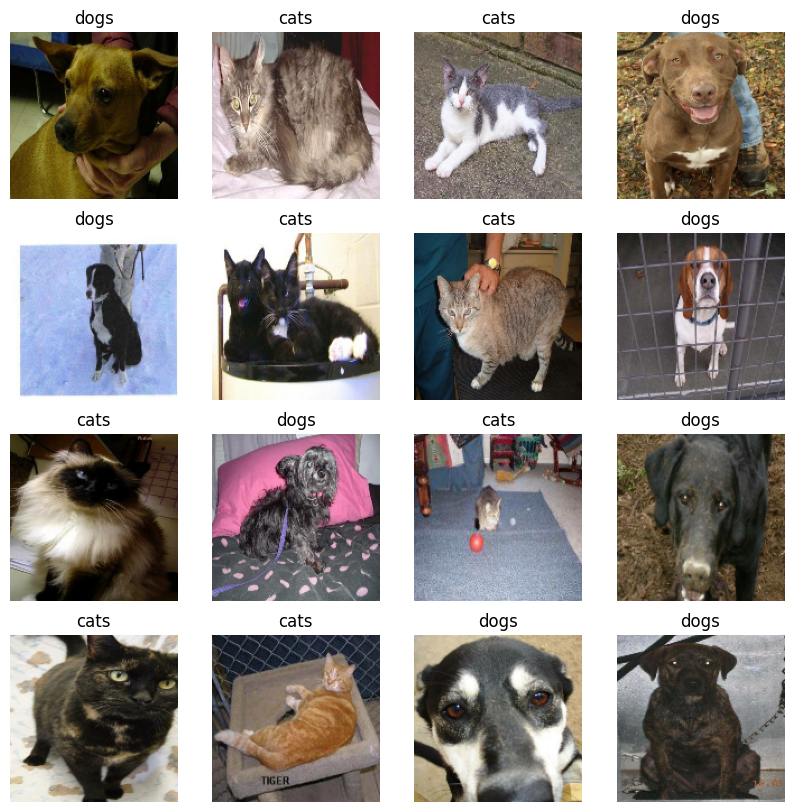

In [82]:
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(16):
#     ax = plt.subplot(4, 4, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
label_count=dataset['target'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

In [99]:

len(get_methods(df['foo']))

C:\Users\GhilesBERREFAS\AppData\Local\Temp\ipykernel_31832\1818199398.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if callable(getattr(object, method_name)):


361

In [111]:
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break
type(train_ds)
res = get_methods(train_ds) 
print(list(filter(lambda elem : not elem.startswith("_"), res)))
np_train = list(train_ds.as_numpy_iterator())


['apply', 'as_numpy_iterator', 'batch', 'bucket_by_sequence_length', 'cache', 'cardinality', 'choose_from_datasets', 'concatenate', 'enumerate', 'filter', 'flat_map', 'from_generator', 'from_tensor_slices', 'from_tensors', 'get_single_element', 'group_by_window', 'interleave', 'list_files', 'load', 'map', 'options', 'padded_batch', 'prefetch', 'random', 'range', 'reduce', 'rejection_resample', 'repeat', 'sample_from_datasets', 'save', 'scan', 'shard', 'shuffle', 'skip', 'snapshot', 'take', 'take_while', 'unbatch', 'unique', 'window', 'with_options', 'zip']


In [116]:
print(len(np_train))

625


In [119]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [120]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
print(labels_batch[0])
print(f'{len(image_batch)}  | {len(labels_batch)}')
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

tf.Tensor(1, shape=(), dtype=int32)
32  | 32
0.013777763 1.0


In [122]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

res = get_methods(train_ds) 
print(list(filter(lambda elem : not elem.startswith("_"), res)))
# print(train_ds)

['apply', 'as_numpy_iterator', 'batch', 'bucket_by_sequence_length', 'cache', 'cardinality', 'choose_from_datasets', 'concatenate', 'enumerate', 'filter', 'flat_map', 'from_generator', 'from_tensor_slices', 'from_tensors', 'get_single_element', 'group_by_window', 'interleave', 'list_files', 'load', 'map', 'options', 'padded_batch', 'prefetch', 'random', 'range', 'reduce', 'rejection_resample', 'repeat', 'sample_from_datasets', 'save', 'scan', 'shard', 'shuffle', 'skip', 'snapshot', 'take', 'take_while', 'unbatch', 'unique', 'window', 'with_options', 'zip']
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [125]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(150, 150, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# #########################
# model.summary()

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2)
])
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [130]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25,
  workers=5
)

Epoch 1/25
625/625 [==============================] - 30s 48ms/step - loss: 0.5730 - accuracy: 0.7013 - val_loss: 0.5435 - val_accuracy: 0.7254
Epoch 2/25
625/625 [==============================] - 24s 38ms/step - loss: 0.4932 - accuracy: 0.7591 - val_loss: 0.5326 - val_accuracy: 0.7342
Epoch 3/25
625/625 [==============================] - 24s 38ms/step - loss: 0.4012 - accuracy: 0.8165 - val_loss: 0.5565 - val_accuracy: 0.7356
Epoch 4/25
625/625 [==============================] - 23s 37ms/step - loss: 0.3084 - accuracy: 0.8666 - val_loss: 0.6640 - val_accuracy: 0.7336
Epoch 5/25
625/625 [==============================] - 24s 38ms/step - loss: 0.2359 - accuracy: 0.9011 - val_loss: 0.7573 - val_accuracy: 0.7150
Epoch 6/25
625/625 [==============================] - 23s 37ms/step - loss: 0.1997 - accuracy: 0.9208 - val_loss: 0.8897 - val_accuracy: 0.7010
Epoch 7/25
625/625 [==============================] - 23s 37ms/step - loss: 0.1358 - accuracy: 0.9481 - val_loss: 1.0139 - val_accuracy:

<AxesSubplot: >

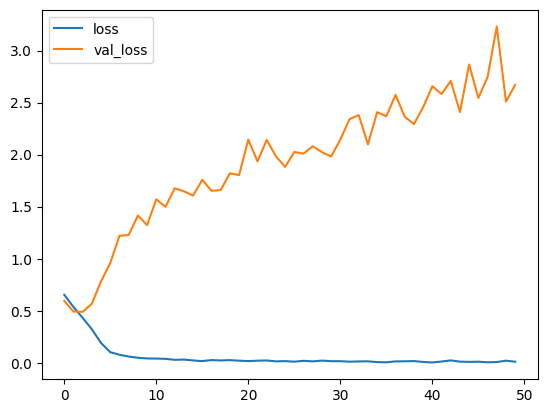

In [59]:
import pandas as pd
# print(history.history)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Maximum accuracy : 0.772599995136261


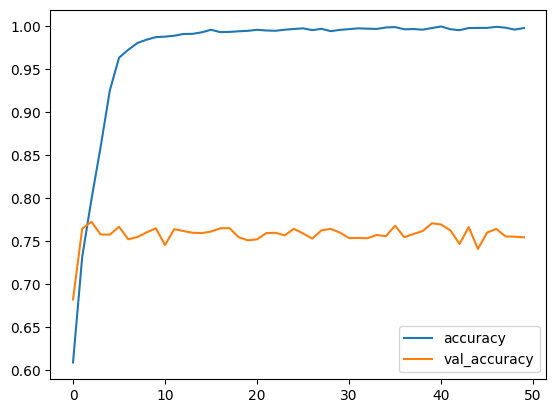

In [131]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Maximum accuracy : {}".format(history_df['val_accuracy'].max()))